Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.cluster import KMeans

Подгружаем датасет

In [2]:
#from google.colab import drive для работы в google collab
#drive.mount('/content/drive') для работы в google collab

In [3]:
#df = pd.read_csv("drive/MyDrive/IQ_level.csv") для работы в google collab
df = pd.read_csv("IQ_level.csv")
df.head(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1
5,6,South Korea,103,1024.0,22805.0,18.2
6,7,Netherlands,101,2386.0,45337.0,14.4
7,8,Finland,101,2725.0,42706.0,8.2
8,9,Canada,100,2052.0,40207.0,7.4
9,10,North Korea,100,NaN,NaN,15.3


Добавляем новый атрибут - ранг страны по размеру расходов на образование, и сохраняем обновленный датасет в новый файл

In [4]:
df_new_attribute = df.sort_values(by='education_expenditure', ascending=False)
df_new_attribute['rank_expenditure'] = range(1, len(df_new_attribute) + 1)
df_new_attribute.to_csv('IQ_level_new.csv', index=False)

In [5]:
df = pd.read_csv("IQ_level_new.csv")

Отсортируем датасет по рангу страны по уровню IQ - то есть вернем изначальный порядок данных.

In [6]:
sort_attribute = 'rank'
df_1 = df.sort_values(by=sort_attribute)
df_1.to_csv('IQ_level_new2.csv', index=False)
df = pd.read_csv("IQ_level_new2.csv")
df.head(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp,rank_expenditure
0,1,Hong Kong,106,1283.0,35304.0,26.2,28
1,2,Japan,106,1340.0,40964.0,19.2,27
2,3,Singapore,106,1428.0,41100.0,31.5,25
3,4,Taiwan,106,NaN,NaN,26.9,104
4,5,China,104,183.0,4654.0,19.1,65
5,6,South Korea,103,1024.0,22805.0,18.2,32
6,7,Netherlands,101,2386.0,45337.0,14.4,12
7,8,Finland,101,2725.0,42706.0,8.2,8
8,9,Canada,100,2052.0,40207.0,7.4,18
9,10,North Korea,100,NaN,NaN,15.3,105


Проверим, есть ли пропущенные значения

In [7]:
empty_values = df.isnull().sum()
print(empty_values)

rank                     0
country                  0
IQ                       0
education_expenditure    5
avg_income               2
avg_temp                 0
rank_expenditure         0
dtype: int64


Пропущенные значения есть, обработаем их - удалим

In [8]:
df_new = df.dropna()

Убедимся, что пропущенных значений больше нет

In [9]:
empty_or_not_values = df_new.isnull().sum()
print(empty_or_not_values)

rank                     0
country                  0
IQ                       0
education_expenditure    0
avg_income               0
avg_temp                 0
rank_expenditure         0
dtype: int64


Выведем количество строк в датасете

In [10]:
count_rows = df_new.shape[0]
print("Количество строк в датасете:", count_rows)

Количество строк в датасете: 103


Удалим выбросы с помощью межквартильного расстояния (IQR). IQR - это разница между третьим (75-й процентиль) и первым (25-й процентиль) квартилями данных. Точки данных, которые находятся за пределами установленного порога между (Q1 - 1.5 * IQR) и (Q3 + 1.5 * IQR) - выбросы.

В коде ниже мы сначала считаем межквартильное расстояние, затем определяем выбросы (вне этого расстояния), затем удаляем строки с выбросами и сохраняем обновленный датасет в новый файл

In [11]:

numerical_columns = df_new.select_dtypes(include=['number'])
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)

df_without_outliers = df_new[~outliers]

df_without_outliers.to_csv('IQ_level_new3.csv', index=False)

Посчитаем еще раз количество строк: их меньше - выбросы удалены.

In [12]:
df_new = pd.read_csv("IQ_level_new3.csv")
count_rows = df_new.shape[0]
print("Количество строк в датасете:", count_rows)

Количество строк в датасете: 94


Проверим, есть ли дубликаты

In [13]:
duplicate_rows_df = df_new[df_new.duplicated()]
print(duplicate_rows_df)

Empty DataFrame
Columns: [rank, country, IQ, education_expenditure, avg_income, avg_temp, rank_expenditure]
Index: []


Дубликатов нет, добавим их сами

In [14]:
for _ in range(10):
  df_new = pd.concat([df_new, df_new.loc[[random.randint(0, 88)]]], ignore_index=True)
  df_new

In [15]:
duplicate_rows_df = df_new[df_new.duplicated()]
print(duplicate_rows_df.shape)

(10, 7)


И удалим:

*(так же сохраним "обновленный" датасет в новый файл - бессмысленно, но действуем так, будто дубликаты были)*

In [16]:
df_new = df_new.drop_duplicates()
df_new.to_csv('IQ_level_new4.csv', index=False)
duplicate_rows_df = df_new[df_new.duplicated()]
print(duplicate_rows_df.shape)

(0, 7)


Обновим данные в датасете: снова добавим ранг страны по размеру расходов на образование, пересчитаем ранг страны по уровню IQ и отсортируем снова по этому параметру

In [17]:
df_new_attribute = df_new.sort_values(by='education_expenditure', ascending=False)
df_new_attribute['rank_expenditure'] = range(1, len(df_new_attribute) + 1)
df_new_attribute.to_csv('IQ_level_new5.csv', index=False)
df_new = pd.read_csv("IQ_level_new5.csv")

df_sorted = df_new.sort_values(by='IQ', ascending=False)
df_sorted['rank'] = range(1, len(df_sorted) + 1)
df_sorted.to_csv('IQ_level_new7.csv', index=False)
df_new = pd.read_csv("IQ_level_new7.csv")
df_new.head(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp,rank_expenditure
0,1,Hong Kong,106,1283.0,35304.0,26.2,20
1,2,Japan,106,1340.0,40964.0,19.2,19
2,3,Singapore,106,1428.0,41100.0,31.5,17
3,4,China,104,183.0,4654.0,19.1,57
4,5,South Korea,103,1024.0,22805.0,18.2,24
5,6,Finland,101,2725.0,42706.0,8.2,1
6,7,Netherlands,101,2386.0,45337.0,14.4,5
7,8,Canada,100,2052.0,40207.0,7.4,11
8,9,Estonia,100,749.0,13770.0,10.1,30
9,10,Germany,100,1883.0,39911.0,13.8,14


Построим графики зависимостей:

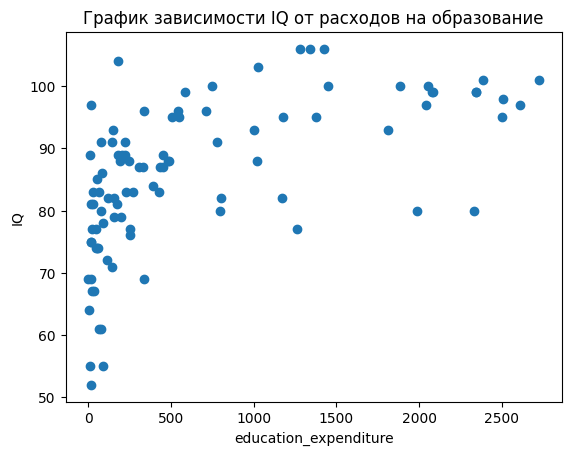

In [19]:
y = 'IQ'
x = 'education_expenditure'
plt.scatter(df_new[x], df_new[y])
plt.xlabel(x)
plt.ylabel(y)
x1 = "расходов на образование"
plt.title('График зависимости {} от {}'.format(y, x1))
plt.show()

Какие кластеры и ярковыраженные группы вижу:

Здесь наблюдаю ярковыраженную группу с низкими расходами на образование но с большим разбросам по IQ. В целом вижу 3 кластера (совпадут с кластеризацией ниже), которые имеют еще и логический смысл.

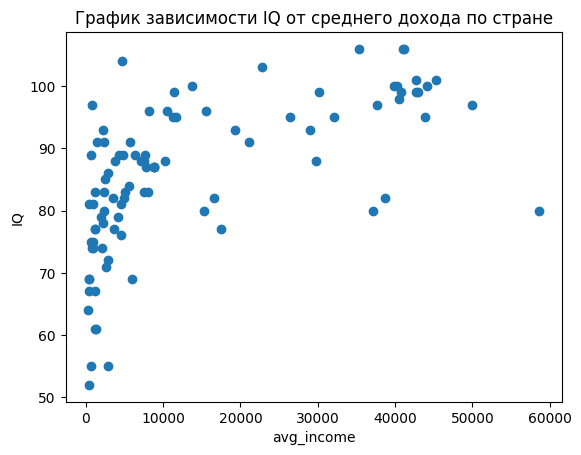

In [20]:
y = 'IQ'
x = 'avg_income'
plt.scatter(df_new[x], df_new[y])
plt.xlabel(x)
plt.ylabel(y)
x1 = "среднего дохода по стране"
plt.title('График зависимости {} от {}'.format(y, x1))
plt.show()

Ярковыраженная группа в том же месте, думаю, это тоже отдельный кластер. Могу увидеть еще два кластера правее, но смущают далеко находящиеся точки.

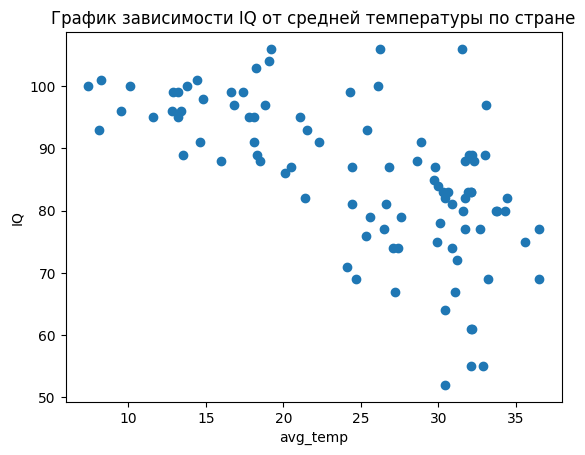

In [21]:
y = 'IQ'
x = 'avg_temp'
plt.scatter(df_new[x], df_new[y])
plt.xlabel(x)
plt.ylabel(y)
x1 = "средней температуры по стране"
plt.title('График зависимости {} от {}'.format(y, x1))
plt.show()

Думаю могу выделить 4 кластера: уплотнение слева, правее него но выше и более разреженный, ниже и плотный (ярковыраженная группа), и самый низкий с меньшим количеством точек.

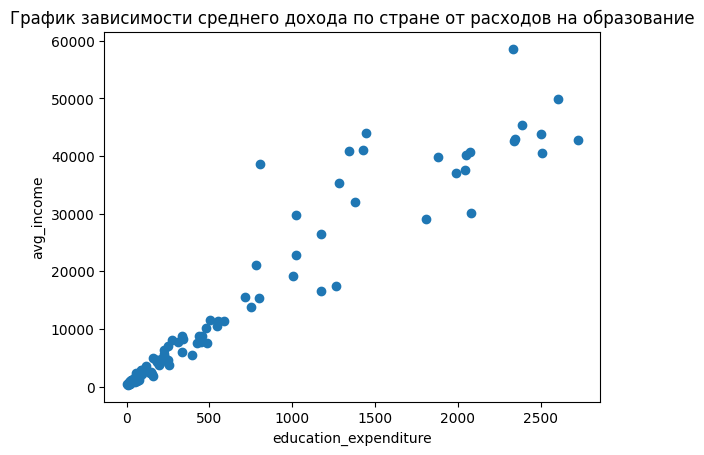

In [22]:
x = 'education_expenditure'
y = 'avg_income'
plt.scatter(df_new[x], df_new[y])
plt.xlabel(x)
plt.ylabel(y)
y1 = "среднего дохода по стране"
x1 = "расходов на образование"
plt.title('График зависимости {} от {}'.format(y1, x1))
plt.show()

Здесь ярковыраженная группа в левом нижнем углу, кластеров вижу 5 - левый нижний, дальше правее, дальше правее и выше, правее и ниже, правее и ниже.

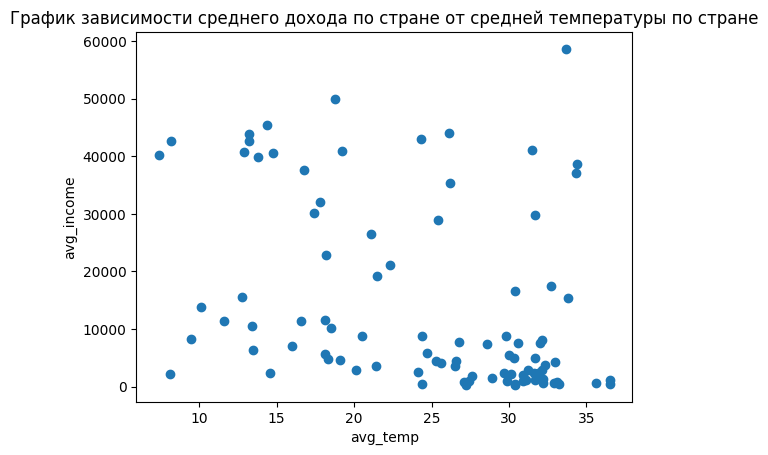

In [23]:
x = 'avg_temp'
y = 'avg_income'
plt.scatter(df_new[x], df_new[y])
plt.xlabel(x)
plt.ylabel(y)
y1 = "среднего дохода по стране"
x1 = "средней температуры по стране"
plt.title('График зависимости {} от {}'.format(y1, x1))
plt.show()

Ярковыраженная группа справа внизу, ее выделяю в кластер. Второй - слева от этой группы, и над ними еще 2 кластера выше.

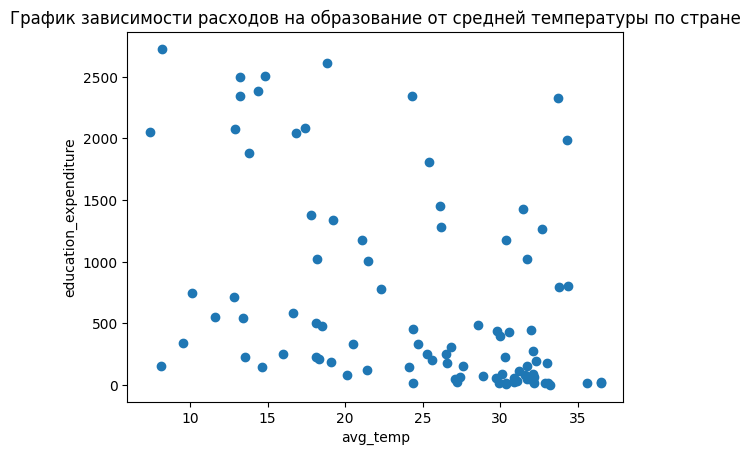

In [24]:
y = 'education_expenditure'
x = 'avg_temp'
plt.scatter(df_new[x], df_new[y])
plt.xlabel(x)
plt.ylabel(y)
y1 = "расходов на образование"
x1 = "средней температуры по стране"
plt.title('График зависимости {} от {}'.format(y1, x1))
plt.show()

Ярковыраженная группа внизу справа, снова второй кластер левее, еще кластер над первым, еще маленький над первыми двумя, и пятый слева вверху.

Выделим данные - столбцы IQ и education_expenditure

In [25]:
x = df_new.iloc[:,[3,2]].values

Определим оптимальное количество кластеров методом локтя: строим модели k-means с разным числом кластеров и записываем значения инерции для каждой модели. Затем смотрим график зависимости значения инерции от количества кластеров и там, где график перестает быстро изменяться, смотрим на значение количества кластеров и именно оно и будет оптимальным (потому что много кластеров тоже плохо).

*wcss - Within-Cluster Sum of Squares - значение инерции

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

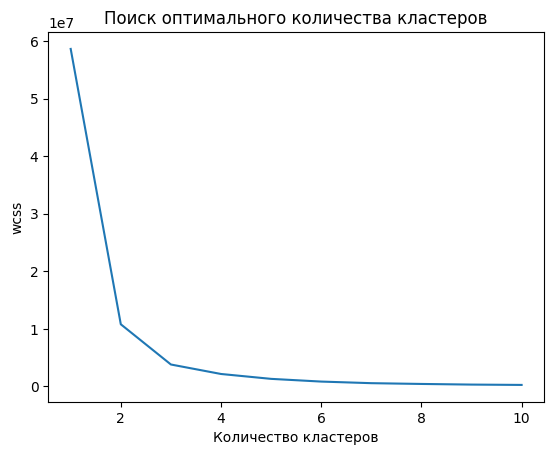

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Поиск оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

Оптимальное количество кластеров - 3.

Создаем модель k-means с числом кластеров 3, начальным состоянием генератора случайных чисел = 42 и с использованием k-means++ - улучшения выбора начальных центроидов, чтобы повлиять на эффективность алгоритма в лучшую сторону. Начальный центроид выбирается случайно, а следующие - с вероятностью, пропорциональной квадрату расстояния от точек данных до ближайшего центроида, благодаря чему  центроиды находятся на достаточном расстоянии друг от друга и качество кластеризации улучшается.

Про работу второй строки кода:

kmeans.fit(X) - обучение модели k-means на данных X.

kmeans.predict(X) - метка кластера для каждой точки в X. Но эффективнее использовать вместо этих двух функций fit_predict.

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Визуализация кластеризации:

Создаем график рассеивания с точками данных, отнесенных к каждому конкретному кластеру.

Кластеры с индексами 0,1,2 и столбцы под индексами 0 и 1 из данных X.

Так же отобразим на графике центроиды. Для этого выбираются первый и второй столбцы из координат центроидов из cluster_centers_ - это соответственно координаты x и y.

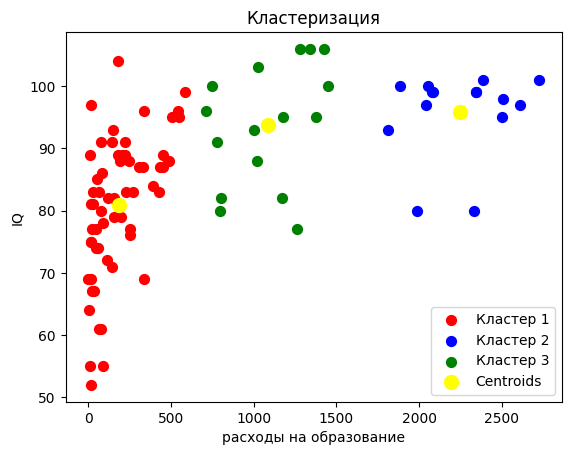

In [28]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Кластеризация')
plt.xlabel('расходы на образование')
plt.ylabel('IQ')
plt.legend()
plt.show()

Кластерный анализ между атрибутами "IQ" и "education_expenditure":

Можно увидеть три основные группы:

кластер 3 обозначает страны с высоким уровнем IQ при высоких расходах на образование, кластер 2 обозначает страны с меньшими расходами на образование и потому здесь можно увидеть и более низкое значение IQ, а вот кластер 1 показывает, что несмотря на низкие расходы на образование показатель IQ может быть любым, однако бо‌льшее уплотнение наблюдается в пределах от 70 до 90 IQ.

Таким образом можно сказать, что образовательные затраты в целом соответствуют ожидаемому уровню IQ в кластерах. Так, в странах с большими расходами на образование мы ожидаем соответственно высокий уровень IQ.

По кластеру 1, где при низких расходах на образование можно увидеть высокое значение IQ, можно предположить, что страна использует другие стратегии образования

Кластеры по данным avg_income и IQ

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

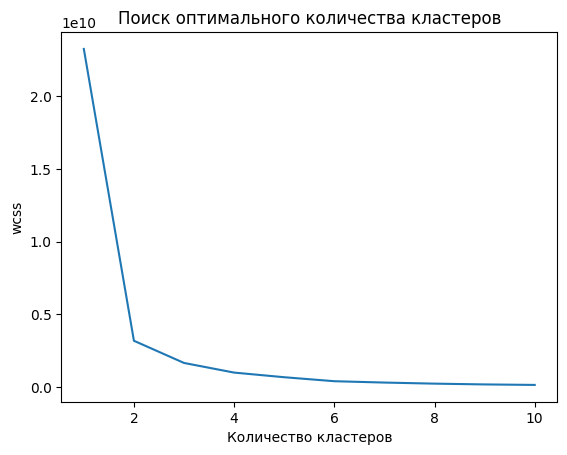

In [29]:
x = df_new.iloc[:,[4,2]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Поиск оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


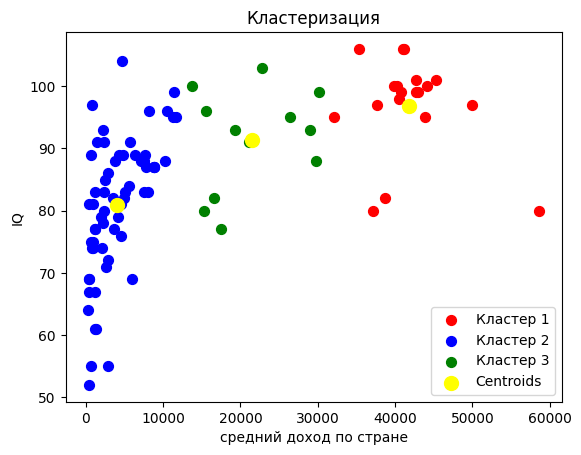

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Кластеризация')
plt.xlabel('средний доход по стране')
plt.ylabel('IQ')
plt.legend()
plt.show()

Кластерный анализ между атрибутами IQ и avg_income

Касаемо кластеров и того, какие данные они в себе собрали, здесь все аналогично выводам выше, с заменой "расходы на образование" на "средний доход по стране"

В целом, как и ожидалось, чем выше IQ тем выше средний доход, т.е. они достаточно тесно связаны, однако есть исключени - высокие показатели IQ при низком доходе, что является неожиданным и указывает на наличие каких-либо уникальных факторов, приводящих к такой экономической ситуации.

Кластеры по данным avg_temp и IQ

In [30]:
df_new['avg_temp'] = df_new['avg_temp'].round()
df_new.head(10)

,rank,country,IQ,education_expenditure,avg_income,avg_temp,rank_expenditure
0,1,Hong Kong,106,1283.0,35304.0,26.0,20
1,2,Japan,106,1340.0,40964.0,19.0,19
2,3,Singapore,106,1428.0,41100.0,32.0,17
3,4,China,104,183.0,4654.0,19.0,57
4,5,South Korea,103,1024.0,22805.0,18.0,24
5,6,Finland,101,2725.0,42706.0,8.0,1
6,7,Netherlands,101,2386.0,45337.0,14.0,5
7,8,Canada,100,2052.0,40207.0,7.0,11
8,9,Estonia,100,749.0,13770.0,10.0,30
9,10,Germany,100,1883.0,39911.0,14.0,14


C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

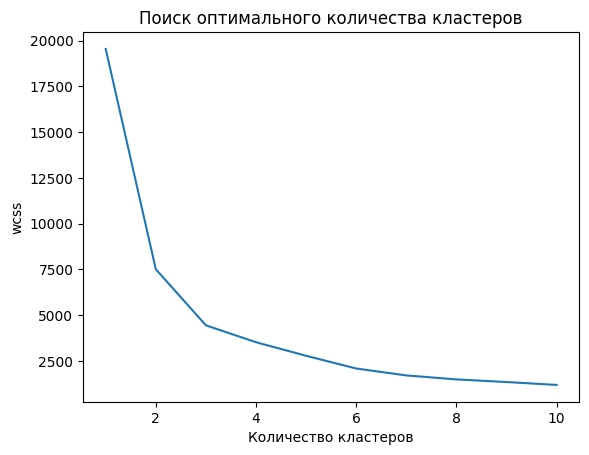

In [31]:
x = df_new.iloc[:,[5,2]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Поиск оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


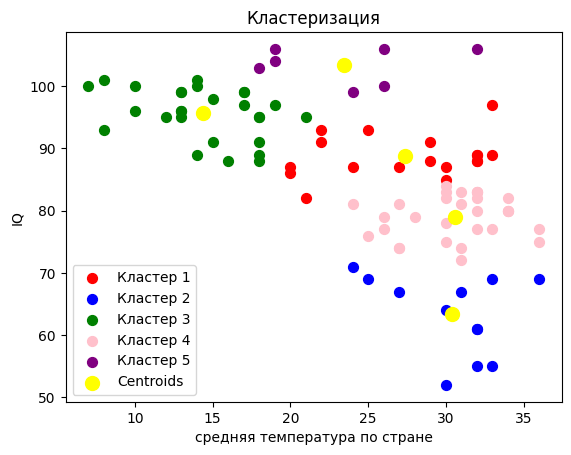

In [32]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 50, c = 'pink', label = 'Кластер 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 50, c = 'purple', label = 'Кластер 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Кластеризация')
plt.xlabel('средняя температура по стране')
plt.ylabel('IQ')
plt.legend()
plt.show()

Кластерный анализ IQ и avg_temp:

Получилось 5 кластеров: страны с высоким уровенем IQ и прохладным климатом, чуть ниже IQ и более теплый климат, жаркие страны с высоким, средним и низким уровнем IQ.
Кратко - в целом чем жарче в стране климат, тем ниже ее средний показатель IQ, т.е. тут кластерный анализ нам показывает, как разные климатические условия связаны с уровнем IQ.
Это может быть связано с большим комфортом в прохладном климате и его влияние на здоровье и, как следствие, образование людей. Так же культурные особенности например жарких стран могут влиять на подходы к образованию.



Кластеры по данным education_expenditure и avg_income

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

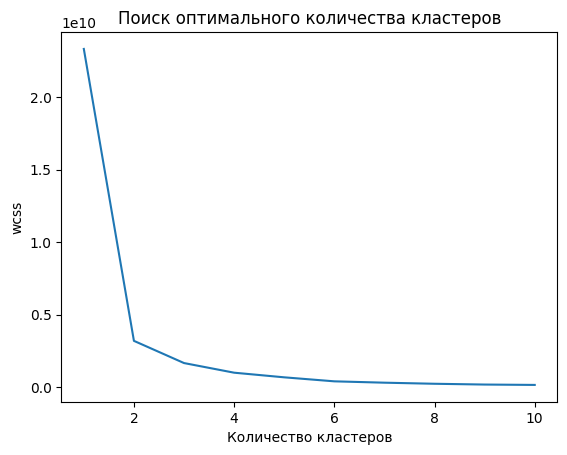

In [33]:
x = df_new.iloc[:,[3,4]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Поиск оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


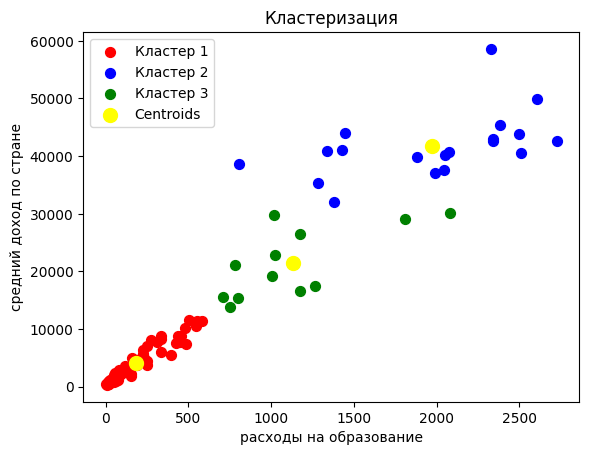

In [34]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Кластеризация')
plt.xlabel('расходы на образование')
plt.ylabel('средний доход по стране')
plt.legend()
plt.show()

Кластерный анализ avg_income и education_expenditure

Здесь очевидные кластеры: низкий доход при низких расходах на образование, средний при средних, высокий при выоских.
Можно сделать вывод, что в целом в странах наблюдается эффективность образовательных затрат и они соответствуют ожиданиям.

Кластеры по данным avg_temp и avg_income

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

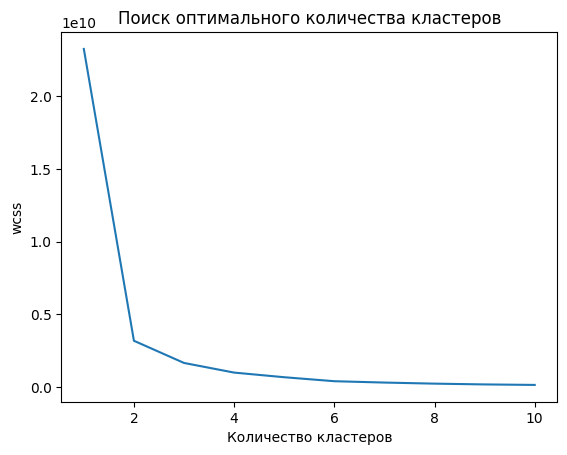

In [35]:
x = df_new.iloc[:,[5,4]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Поиск оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)



C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


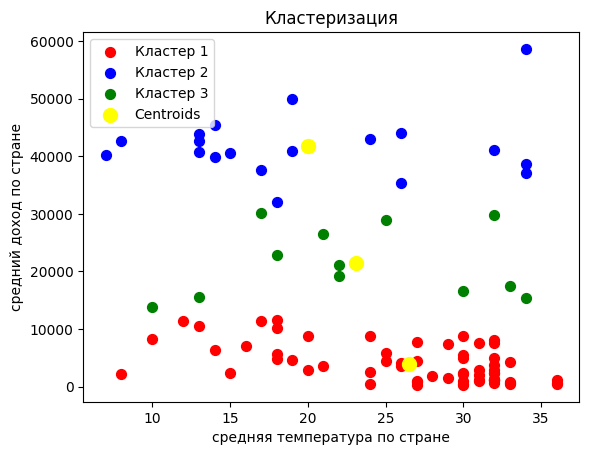

In [37]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Кластеризация')
plt.xlabel('средняя температура по стране')
plt.ylabel('средний доход по стране')
plt.legend()
plt.show()

Кластерный анализ avg_temp и avg_income

На самом деле здесь достаточно сложно что-то сказать из-за разброса данных и ленточной структуры кластеров. В целом наибольшее уплотнение мы видим во 2 кластере и именно в сочетании низкого среднего дохода и высоких температур, что возвращает нас в выводам про связь IQ и температуры.

Такой разброс (разный доход при разных температурах) по сути обуславливается тем, что в странах несмотря на климат могут развиваться различные отрасли, например туристическая в теплых странах и тд, потому нет прямой связи климата и дохода.

Кластеры по данным avg_temp и education_expenditure

C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lisas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

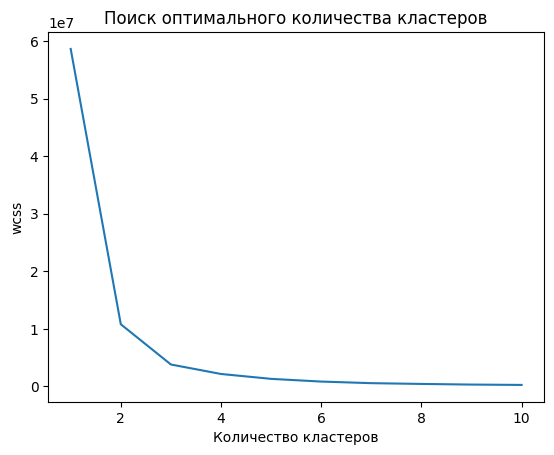

In [38]:
x = df_new.iloc[:,[5,3]].values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Поиск оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('wcss')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


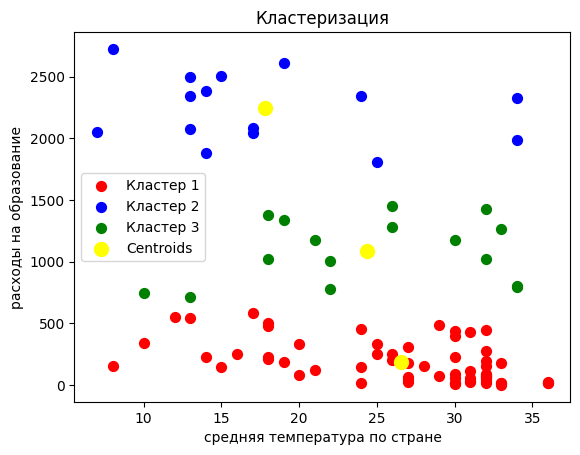

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Кластер 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Кластер 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Кластер 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Кластеризация')
plt.xlabel('средняя температура по стране')
plt.ylabel('расходы на образование')
plt.legend()
plt.show()

Кластерный анализ avg_temp и education_expenditure

Здесь все аналогично предыдущему выводу. По сути мы тут (и аналогично выше) просто берем кластеры с высокими/низкими/средними расходами на образование, но будет температурный разброс.

Общий вывод

По итогу кластерных анализов можно сказать, что во-первых не всегда мое собственное визуальное разбиение на кластеры совпадает с разбиением k-means, а во-вторых не для всех пар атрибутов в этом датасете кластеризация играет роль, т.е. где то кластеры достаточно логичные и их удобно далее использовать, а где-то в них будто бы не так много смысла.